In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2011.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0     optimalisasi keamanan jaringan pemfilteran apl...
1     sistem informasi web jurusan sistem informasi ...
2     teknologi bluetooth aplikasinya jaringan komputer
3               teori modul praktikum jaringan komputer
4           membangun jaringan komputer server internet
5     simulasi pemanfaatan dynamic routing protocol ...
6     analisis perancangan jaringan komputer studi k...
7     pengembangan desain pembelajaran mobile learni...
8         kitab suci jaringan komputer koneksi internet
9     perancangan implementasi video demand jaringan...
10    jaringan komputer radio itb telah tersambung j...
11       simulasi model jaringan mobile ad hoc manet ns
12    implementasi load balance jaringan multihoming...
13                   real time system jaringan komputer
14    analisa implementasi sistem keamanan jaringan ...
15            manajemen jaringan wireless server radius
16    implementasi rule expert systems mendeteks

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

6072
[['optimalisasi', 'keamanan', 'jaringan', 'pemfilteran', 'aplikasi', 'mikrotik']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['optimalisasi', 'keamanan', 'jaringan', 'pemfilteran', 'aplikasi', 'mikrotik', 'keamanan_jaringan', 'keamanan_jaringan', 'keamanan_jaringan'], ['sistem', 'informasi', 'web', 'jurusan', 'sistem', 'informasi', 'fakultas', 'ilmu', 'komputer', 'universitas', 'sriwijaya', 'fakultas_ilmu', 'sistem_informasi', 'sistem_informasi', 'fakultas_ilmu', 'fakultas_ilmu'], ['teknologi', 'bluetooth', 'aplikasinya', 'jaringan', 'komputer', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['teori', 'modul', 'praktikum', 'jaringan', 'komputer', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['membangun', 'jaringan', 'komputer', 'server', 'internet', 'jaringan_komputer', 'membangun_jaringan', 'jaringan_komputer'], ['simulasi', 'pemanfaatan', 'dynamic', 'routing', 'protocol', 'ospf', 'router', 'jaringan', 'komputer', 'unpar', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['analisis', 'perancangan', 'jaringan', 'komputer', 'studi', 'kasus', 'inna', 'garuda'

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                0             1             2             3             4   \
0     optimalisasi      keamanan      jaringan   pemfilteran      aplikasi   
1           sistem     informasi           web       jurusan        sistem   
2        teknologi     bluetooth   aplikasinya      jaringan      komputer   
3            teori         modul     praktikum      jaringan      komputer   
4        membangun      jaringan      komputer        server      internet   
5         simulasi   pemanfaatan       dynamic       routing      protocol   
6         analisis   perancangan      jaringan      komputer         studi   
7     pengembangan        desain  pembelajaran        mobile      learning   
8            kitab          suci      jaringan      komputer       koneksi   
9      perancangan  implementasi         video        demand      jaringan   
10        jaringan      komputer         radio           itb         telah   
11        simulasi         model      jaringan        mobile    

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(8861 unique tokens: ['aplikasi', 'jaringan', 'keamanan', 'keamanan_jaringan', 'mikrotik']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

6072


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.4162786962
Num Topics = 4  has Coherence Value of 0.6084005615
Num Topics = 6  has Coherence Value of 0.6070922217
Num Topics = 8  has Coherence Value of 0.5913050535
Num Topics = 10  has Coherence Value of 0.5817920126
Num Topics = 12  has Coherence Value of 0.5958661796
Num Topics = 14  has Coherence Value of 0.5670813786
Num Topics = 16  has Coherence Value of 0.5083040818
Num Topics = 18  has Coherence Value of 0.5206746232


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4)
pprint(model.print_topics())

[(0,
  '0.013*"studi_kasus" + 0.011*"mata_pelajaran" + 0.009*"e_marketing" + '
  '0.008*"rancang_bangun" + 0.007*"e_commerce" + 0.006*"teknik_informatika" + '
  '0.005*"metodologi_penelitian" + 0.005*"pelajaran" + 0.005*"e" + '
  '0.005*"departemen_agama"'),
 (1,
  '0.009*"studi_kasus" + 0.005*"aplikasi" + 0.005*"kinerja_manajerial" + '
  '0.005*"informasi_akuntansi" + 0.004*"sistem_pakar" + 0.004*"rute" + '
  '0.004*"network_monitoring" + 0.004*"database" + 0.004*"iklan" + '
  '0.004*"uin_syarif"'),
 (2,
  '0.009*"alat_bantu" + 0.008*"studi_empiris" + 0.006*"tanaman_obat" + '
  '0.005*"modul_pembelajaran" + 0.005*"evaluasi_kinerja" + '
  '0.005*"sistem_pendukung" + 0.005*"studi_kasus" + 0.005*"content_management" '
  '+ 0.005*"bni_syariah" + 0.005*"kinerja_pegawai"'),
 (3,
  '0.007*"sms_reminder" + 0.007*"e_commerce" + 0.005*"rancang_bangun" + '
  '0.005*"budaya" + 0.005*"miskin" + 0.005*"jakarta_selatan" + '
  '0.004*"internasional" + 0.004*"prestasi_belajar" + 0.004*"komunikasi" + '

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"mata_pelajaran" + 0.007*"sms_reminder" + 0.006*"sekolah_menengah" + 0.006*"studi_kasus" + 0.006*"pelajaran" + 0.006*"teknik_informatika" + 0.005*"kinerja_manajerial" + 0.005*"jurusan_teknik" + 0.005*"analysis_design" + 0.004*"rute_terpendek"
Topic: 1 Word: 0.011*"studi_kasus" + 0.010*"alat_bantu" + 0.008*"studi_empiris" + 0.007*"masyarakat" + 0.006*"evaluasi_kinerja" + 0.005*"madrasah" + 0.005*"network_monitoring" + 0.005*"departemen_agama" + 0.005*"aplikasi" + 0.005*"miskin"
Topic: 2 Word: 0.008*"e_commerce" + 0.006*"rancang_bangun" + 0.006*"tanaman_obat" + 0.005*"metodologi_penelitian" + 0.005*"modul_pembelajaran" + 0.005*"pln_persero" + 0.005*"hasil_belajar" + 0.005*"uin_syarif" + 0.004*"bni_syariah" + 0.004*"prestasi_belajar"
Topic: 3 Word: 0.010*"studi_kasus" + 0.008*"e_marketing" + 0.005*"rancang_bangun" + 0.005*"rute" + 0.005*"iklan" + 0.004*"sistem_informasi" + 0.004*"aplikasi" + 0.004*"informasi" + 0.004*"pengembangan" + 0.004*"database"


# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,3.0,0.9210,"studi_kasus, e_marketing, rancang_bangun, rute...","[optimalisasi, keamanan, jaringan, pemfilteran..."
1,1,2.0,0.7871,"e_commerce, rancang_bangun, tanaman_obat, meto...","[sistem, informasi, web, jurusan, sistem, info..."
2,2,1.0,0.6977,"studi_kasus, alat_bantu, studi_empiris, masyar...","[teknologi, bluetooth, aplikasinya, jaringan, ..."
3,3,2.0,0.9148,"e_commerce, rancang_bangun, tanaman_obat, meto...","[teori, modul, praktikum, jaringan, komputer, ..."
4,4,2.0,0.9130,"e_commerce, rancang_bangun, tanaman_obat, meto...","[membangun, jaringan, komputer, server, intern..."
5,5,1.0,0.6573,"studi_kasus, alat_bantu, studi_empiris, masyar...","[simulasi, pemanfaatan, dynamic, routing, prot..."
6,6,1.0,0.9535,"studi_kasus, alat_bantu, studi_empiris, masyar...","[analisis, perancangan, jaringan, komputer, st..."
7,7,1.0,0.7571,"studi_kasus, alat_bantu, studi_empiris, masyar...","[pengembangan, desain, pembelajaran, mobile, l..."
8,8,2.0,0.9222,"e_commerce, rancang_bangun, tanaman_obat, meto...","[kitab, suci, jaringan, komputer, koneksi, int..."
9,9,2.0,0.9239,"e_commerce, rancang_bangun, tanaman_obat, meto...","[perancangan, implementasi, video, demand, jar..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

3.0    2046
2.0    1509
1.0    1395
0.0    1122
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

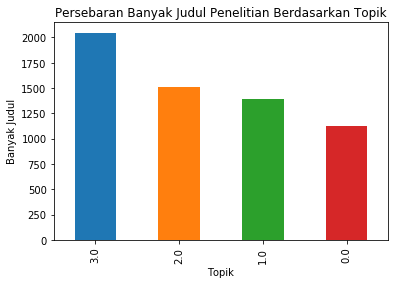

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9763,"mata_pelajaran, sms_reminder, sekolah_menengah, studi_kasus, pelajaran, teknik_informatika, kine...","[pengaruh, penggunaan, metode, kooperatif, model, team, assisted, individualy, tai, motivasi, be..."
1,1.0,0.9778,"studi_kasus, alat_bantu, studi_empiris, masyarakat, evaluasi_kinerja, madrasah, network_monitori...","[rancang, bangun, perangkat, lunak, tes, kompetensi, bidang, komputer, calaon, pegawai, negeri, ..."
2,2.0,0.9766,"e_commerce, rancang_bangun, tanaman_obat, metodologi_penelitian, modul_pembelajaran, pln_persero...","[sistem, penunjang, keputusan, kelayakan, pembiayaan, usaha, kecil, menengah, ukm, logika, fazzy..."
3,3.0,0.9750,"studi_kasus, e_marketing, rancang_bangun, rute, iklan, sistem_informasi, aplikasi, informasi, pe...","[penjurusan, siswa, smk, metode, decission, tree, metode, saw, simple, additive, weighting, stud..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2011.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.130596  0.023753       1        1  29.316830
2      0.042203 -0.127361       2        1  25.830132
1     -0.005909  0.012907       3        1  23.382402
0      0.094302  0.090701       4        1  21.470640, topic_info=     Category       Freq                   Term       Total  loglift  logprob
term                                                                         
672   Default  52.000000         mata_pelajaran   52.000000  30.0000  30.0000
3534  Default  39.000000             alat_bantu   39.000000  29.0000  29.0000
2297  Default  41.000000            e_marketing   41.000000  28.0000  28.0000
941   Default  36.000000          studi_empiris   36.000000  27.0000  27.0000
3085  Default  25.000000           sms_reminder   25.000000  26.0000  26.0000
673   Default  22.000000              pelajaran   22.000000  25.0000  25.0000
122   Def

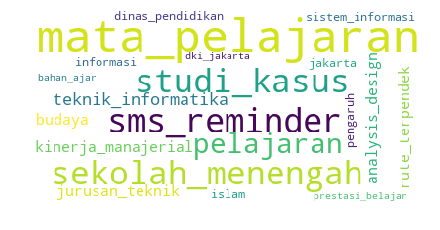

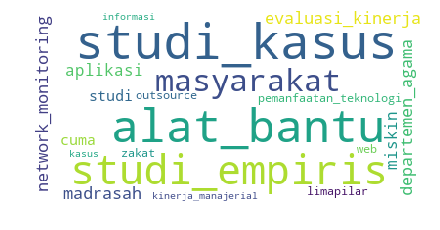

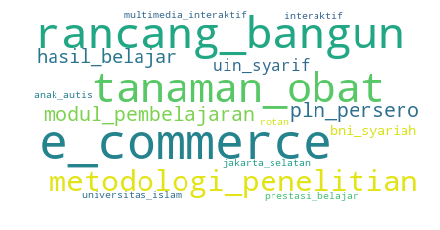

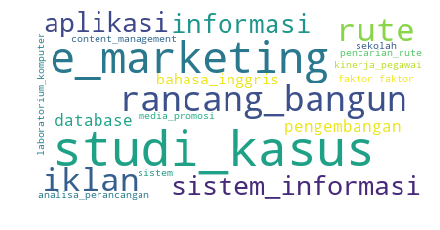

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2011.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')